In [2]:
import tweepy
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
# Your Twitter API Keys
api_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__'))))))
file_name = os.path.join(api_dir, "api_keys.json")
data = json.load(open(file_name))

gkey = data['google_places_api_key']
consumer_key = data['twitter_consumer_key']
consumer_secret = data['twitter_consumer_secret']
access_token = data['twitter_access_token']
access_token_secret = data['twitter_access_token_secret']


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Admin\\Desktop\\api_keys.json'

In [ ]:
# Array of Trains
delayed_trains = {}
    
# Target User
target_user = "SubwayStats"

# Loop through 50 pages of 
for x in range(50):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=x)

    # Loop through all tweets
    for tweet in public_tweets:
        
        # Break tweet text into an array of lowercase words
        tweet_text = tweet["text"].lower().split(" ")
        
        # Print the tweet and date if it contains the word: "delays" or "change"
        if("delays" in tweet_text or "change" in tweet_text):
            print(tweet["text"].lower())
            
            # Loop through hashtags to extract the train names
            for hashtag in tweet["entities"]["hashtags"]:
                
                train_name = hashtag["text"].lower()
                
                # Remove all hashtags that are extraneous
                if (train_name != "nycsubway" and train_name != "mta" and train_name != "nyc"):
                                        
                    # If train is new, add it the list...
                    if(train_name not in delayed_trains):
                        delayed_trains[train_name] = 1
                    
                    # If it already exists add 1 to its count
                    else:    
                        delayed_trains[train_name] += 1 

In [4]:
# Print the Train Delay counts
print(delayed_trains)

# Convert Train Delay object into a series
delayed_trains_pd = pd.Series(delayed_trains)

# Preview the results
delayed_trains_pd

{'ltrain': 46, '4train': 150, '5train': 150, '6train': 150, 'btrain': 194, 'dtrain': 194, 'ftrain': 194, 'mtrain': 194, 'atrain': 136, 'ctrain': 136, 'etrain': 136, '1train': 119, '2train': 119, '3train': 119, '7train': 53, 'gtrain': 20, 'strain': 23, 'ntrain': 147, 'qtrain': 147, 'rtrain': 147, 'wtrain': 147, 'jtrain': 19, 'ztrain': 19, 'sirtrain': 8}


1train      119
2train      119
3train      119
4train      150
5train      150
6train      150
7train       53
atrain      136
btrain      194
ctrain      136
dtrain      194
etrain      136
ftrain      194
gtrain       20
jtrain       19
ltrain       46
mtrain      194
ntrain      147
qtrain      147
rtrain      147
sirtrain      8
strain       23
wtrain      147
ztrain       19
dtype: int64

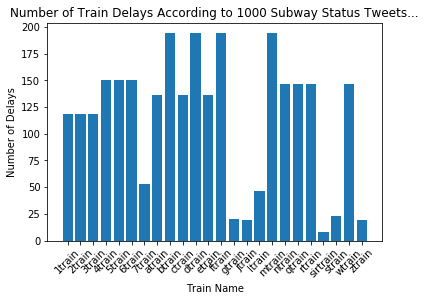

In [7]:
# Create a plot  
len(delayed_trains_pd.index)
plt.bar(range(len(delayed_trains_pd.index)), delayed_trains_pd.values)
plt.xticks(range(len(delayed_trains_pd.index)), delayed_trains_pd.index, rotation=45)
plt.ylabel("Number of Delays")
plt.xlabel("Train Name")
plt.title("Number of Train Delays According to 1000 Subway Status Tweets...")
plt.show()